In [1]:
# ===============================
# Exploratory Data Analysis (EDA)
# ===============================
# AAQIB ALI(AI-358385)
#===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("student_engagement_data_10000.csv")

# ----1: Basic Summary Statistics ----
print("Dataset Info:")
print(df.info(), "\n")

print("Summary Statistics:")
print(df.describe(include="all"), "\n")

print("Missing Values:")
print(df.isnull().sum(), "\n")

print("Value Counts (Learning Mode Prediction):")
print(df['Learning Mode Prediction'].value_counts(), "\n")

print("Value Counts (Student ID):")
print(df['Student ID'].value_counts().head(10), "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB
None 

Summary Statistics:
         Student ID    Session ID        Date  \
count   10000.00000  10000.000000       10000   
unique          NaN           NaN          30   
top 

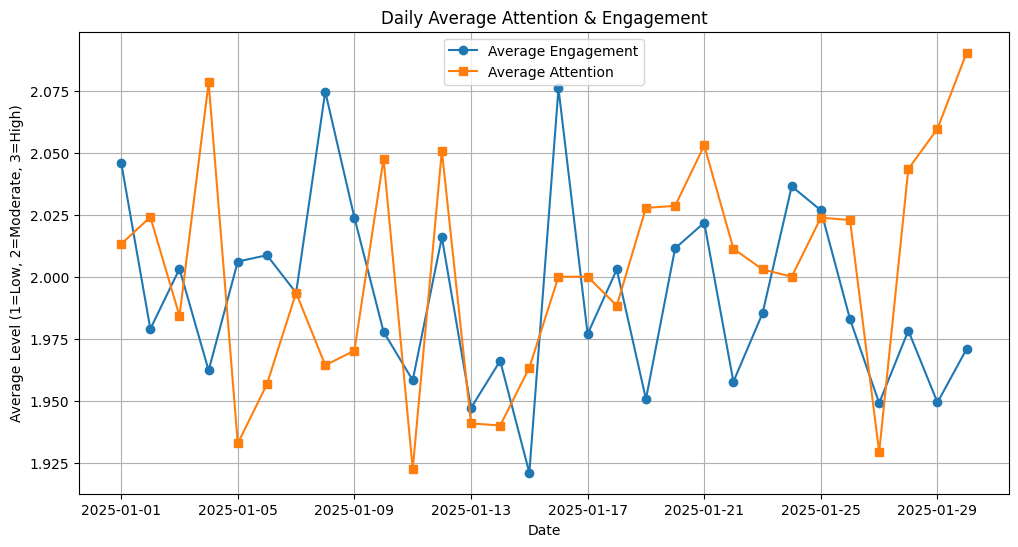

In [2]:
# ===============================
#  Data Preparation
# ===============================

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Encode Engagement and Attention Levels
engagement_map = {"Low": 1, "Moderate": 2, "High": 3}
attention_map = {"Low": 1, "Moderate": 2, "High": 3}

df['Engagement_Num'] = df['Engagement Level'].map(engagement_map)
df['Attention_Num'] = df['Attention Level'].map(attention_map)


# ----2: Daily Average Engagement and Attention ----
daily_avg = df.groupby('Date')[['Engagement_Num', 'Attention_Num']].mean()

plt.figure(figsize=(12,6))
plt.plot(daily_avg.index, daily_avg['Engagement_Num'], label='Average Engagement', marker='o')
plt.plot(daily_avg.index, daily_avg['Attention_Num'], label='Average Attention', marker='s')
plt.xlabel("Date")
plt.ylabel("Average Level (1=Low, 2=Moderate, 3=High)")
plt.title("Daily Average Attention & Engagement")
plt.grid(True)
plt.legend()
plt.show()

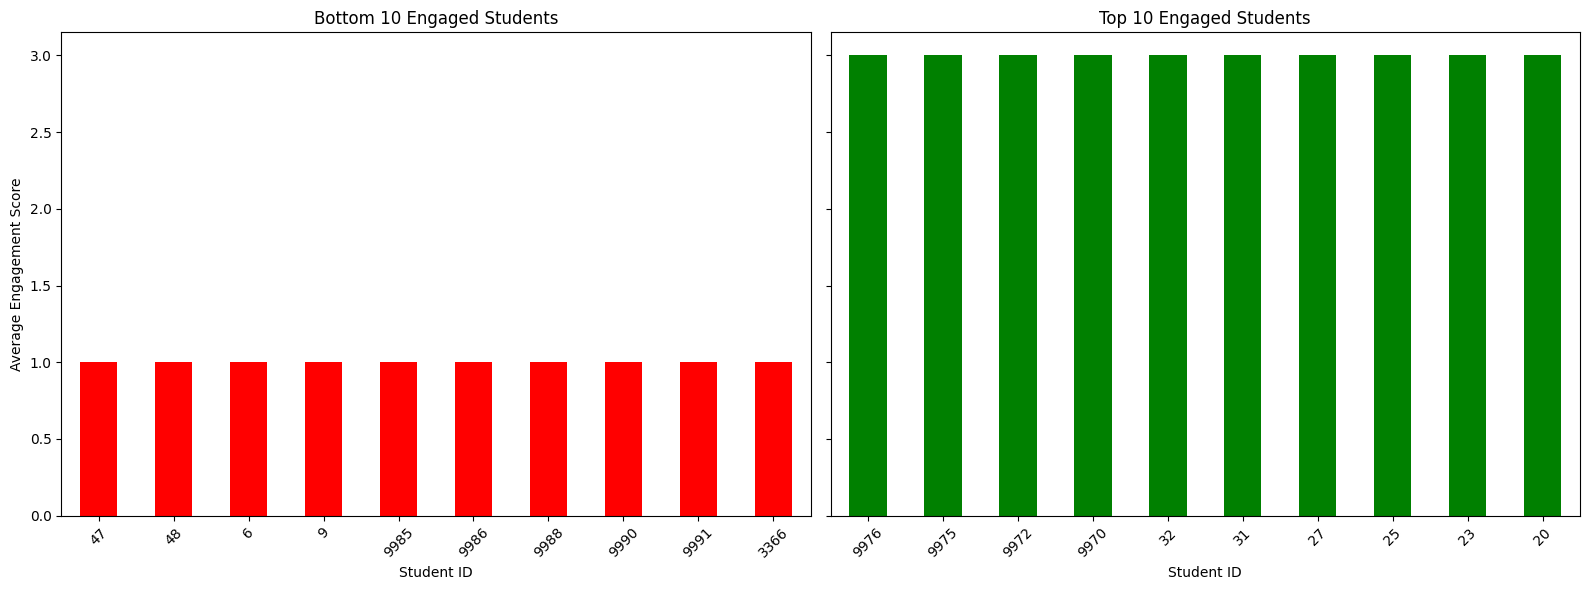

In [3]:
# --- 3: Most and Least Engaged Students ---
student_engagement = df.groupby('Student ID')['Engagement_Num'].mean().sort_values()

# Get top 10 and bottom 10 engaged students
top_10_students = student_engagement.tail(10)
bottom_10_students = student_engagement.head(10)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Top 10 plot
top_10_students.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_title("Top 10 Engaged Students")
axes[1].set_xlabel("Student ID")
axes[1].tick_params(axis='x', rotation=45)

# Bottom 10 plot
bottom_10_students.plot(kind='bar', color='red', ax=axes[0])
axes[0].set_title("Bottom 10 Engaged Students")
axes[0].set_ylabel("Average Engagement Score")
axes[0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


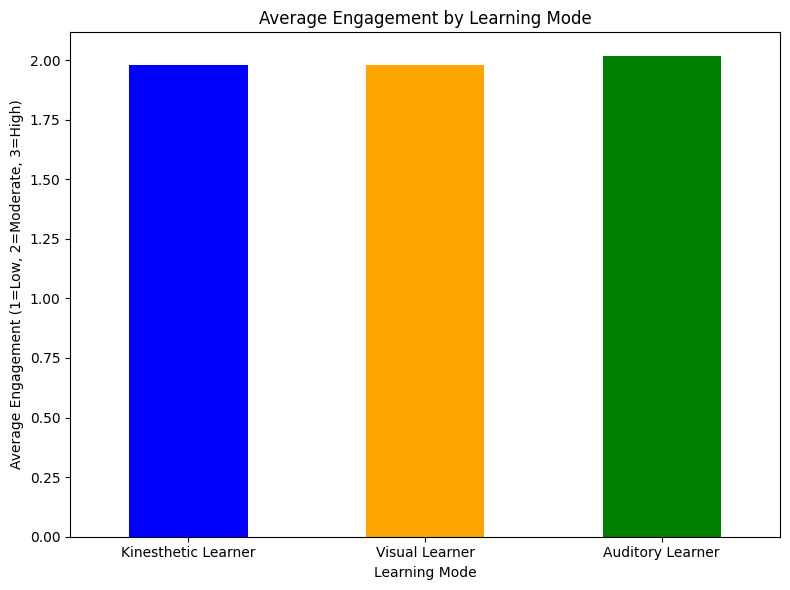

In [4]:
# ---- 4: Engagement by Learning Mode ----
mode_avg = df.groupby('Learning Mode Prediction')['Engagement_Num'].mean().sort_values()

plt.figure(figsize=(8,6))
mode_avg.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Average Engagement by Learning Mode")
plt.ylabel("Average Engagement (1=Low, 2=Moderate, 3=High)")
plt.xlabel("Learning Mode")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()